In [6]:
import random

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [71]:
class Strategy:
    
    def __init__(self, n_arms: int):
        self.n_arms = n_arms
        self.n_iters = 0
        self.arms_states = np.zeros(n_arms)
        self.arms_actions = np.zeros(n_arms)
        
    def flush(self):
        self.n_iters = 0
        self.arms_states = np.zeros(self.n_arms)
        self.arms_actions = np.zeros(self.n_arms)
        
    def update_reward(self, arm: int, reward: int):
        self.n_iters += 1
        self.arms_states[arm] += reward
        self.arms_actions[arm] += 1
        
    def choose_arm(self):
        raise NotImplementedError

In [72]:
class EpsGreedy(Strategy):
    
    def __init__(self, n_arms: int, eps: float = 0.1):
        super().__init__(n_arms)
        self.eps = eps
        
    def choose_arm(self):
        
        if random.random() < self.eps:
            return random.randint(0, self.n_arms - 1)
        else:
            return np.argmax(self.arms_states / self.arms_actions)

In [73]:
class UCB1(Strategy):
    
    def choose_arm(self):
        if self.n_iters < self.n_arms:
            return self.n_iters
        else:
            return np.argmax(self.ucb())
        
        
    def ucb(self):
        ucb = self.arms_states / self.arms_actions
        ucb += np.sqrt(2 * np.log(self.n_iters) / self.arms_actions)
        return ucb

In [74]:
class BernoulliEnv:
    
    def __init__(self, arms_proba: list):
        self.arms_proba = arms_proba
        
    @property
    def n_arms(self):
        return len(self.arms_proba)
        
    def pull_arm(self, arm_id: int):
        if random.random() < self.arms_proba[arm_id]:
            return 1
        else:
            return 0 

In [75]:
class Bandit:
    
    def __init__(self, env: BernoulliEnv, strategy: Strategy):
        self.env = env
        self.strategy = strategy
        
    def action(self):
        arm = self.strategy.choose_arm()
        reward = self.env.pull_arm(arm)
        self.strategy.update_reward(arm, reward)

In [145]:
def calculate_regret(env: BernoulliEnv, strategy: Strategy, n_iters=20000):
    strategy.flush()
    bandit = Bandit(env, strategy)
    regrets = []
    
    for i in range(n_iters):
#         reward = bandit.strategy.arms_actions.dot(env.arms_proba)
        reward = np.sum(bandit.strategy.arms_states)
        optimal_reward = np.max(env.arms_proba) * i
        regret = optimal_reward - reward
        regrets.append(regret)
        bandit.action()
        
    return regrets

In [146]:
env = be; strategy = Thompson(be.n_arms); n_iters=5;
# env = be; strategy = UCB1(be.n_arms); n_iters=10;
print('be.n_arms = ', be.n_arms)

strategy.flush()
bandit = Bandit(env, strategy)
regrets = []
for i in range(n_iters):
    print('i ', i)
    reward2 = np.sum(bandit.strategy.arms_states)
    reward = bandit.strategy.arms_actions.dot(env.arms_proba)
    print('reward ', reward)
    print('reward2 ', reward2)
    print('env.arms_proba ', env.arms_proba)
    optimal_reward = np.max(env.arms_proba) * i
    print('optimal_reward ', optimal_reward)
    regret = optimal_reward - reward
    regrets.append(regret)
    print('regrets ', regrets)
    bandit.action()


be.n_arms =  3
i  0
reward  0.0
reward2  0.0
env.arms_proba  [0.3, 0.5, 0.7]
optimal_reward  0.0
regrets  [0.0]
i  1
reward  0.3
reward2  0.0
env.arms_proba  [0.3, 0.5, 0.7]
optimal_reward  0.7
regrets  [0.0, 0.39999999999999997]
i  2
reward  0.8
reward2  0.0
env.arms_proba  [0.3, 0.5, 0.7]
optimal_reward  1.4
regrets  [0.0, 0.39999999999999997, 0.5999999999999999]
i  3
reward  1.5
reward2  1.0
env.arms_proba  [0.3, 0.5, 0.7]
optimal_reward  2.0999999999999996
regrets  [0.0, 0.39999999999999997, 0.5999999999999999, 0.5999999999999996]
i  4
reward  2.2
reward2  2.0
env.arms_proba  [0.3, 0.5, 0.7]
optimal_reward  2.8
regrets  [0.0, 0.39999999999999997, 0.5999999999999999, 0.5999999999999996, 0.5999999999999996]


In [147]:
# class Thompson(Strategy):
    
#     def __init__(self, n_arms: int):
#     # your code here
        
#     def update_reward(self, arm: int, reward: int):
#     # your code here 
        
#     def choose_arm(self):
#     # your code here

In [148]:
# код для проверки
import random
import numpy as np

class Strategy:
    
    def __init__(self, n_arms: int):
        self.n_arms = n_arms
        self.n_iters = 0
        self.arms_states = np.zeros(n_arms)
        self.arms_actions = np.zeros(n_arms)
        
    def flush(self):
        self.n_iters = 0
        self.arms_states = np.zeros(self.n_arms)
        self.arms_actions = np.zeros(self.n_arms)
        
    def update_reward(self, arm: int, reward: int):
        self.n_iters += 1
        self.arms_states[arm] += reward
        self.arms_actions[arm] += 1
        
    def choose_arm(self):
#         arm = np.argmax(self.arms_states / self.arms_actions)
#         return arm
         raise NotImplementedError
    
class Thompson(Strategy):
    
    def __init__(self, n_arms: int):
        super().__init__(n_arms)
        
    def update_reward(self, arm: int, reward: int):
        self.n_iters += 1
        self.arms_states[arm] += reward
        self.arms_actions[arm] += 1
#         return self.arms_states
        
    def choose_arm(self):
        if (self.n_iters < self.n_arms):
            return self.n_iters
        else:
            return np.argmax(self.arms_states / self.arms_actions)
         



In [149]:
be = BernoulliEnv([0.3, 0.5, 0.7])
eps_1 = EpsGreedy(be.n_arms, 0.1)
eps_2 = EpsGreedy(be.n_arms, 0.3)
eps_3 = EpsGreedy(be.n_arms, 0.5)
ucb = UCB1(be.n_arms)

In [150]:
# следующая строка должна работать
tompson = Thompson(be.n_arms)

In [151]:
# Calculate regrets
eps_regrets = calculate_regret(be, eps_1)
eps_2_regrets = calculate_regret(be, eps_2)
eps_3_regrets = calculate_regret(be, eps_3)
ucb_regrets = calculate_regret(be, ucb)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


In [152]:
# следующая строка должна работать
tompson_regrets = calculate_regret(be,tompson)

Text(0, 0.5, 'cumulative regret (less is better)')

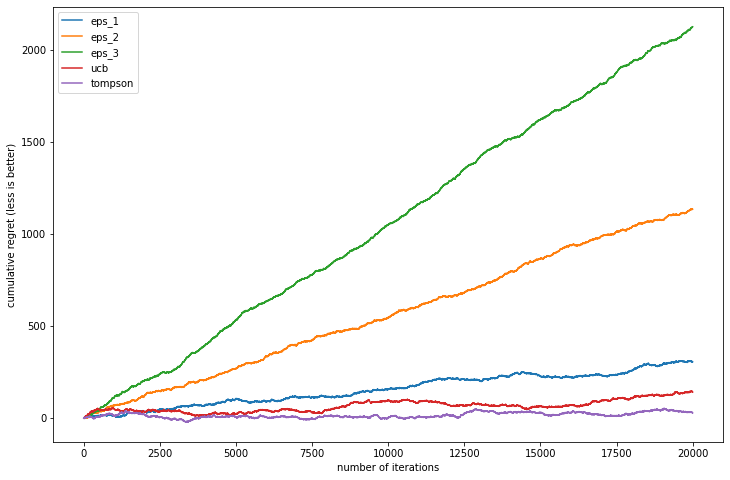

In [153]:
plt.figure(figsize=(12, 8))
plt.plot(eps_regrets, label='eps_1')
plt.plot(eps_2_regrets, label='eps_2')
plt.plot(eps_3_regrets, label='eps_3')
plt.plot(ucb_regrets, label='ucb')
plt.plot(tompson_regrets, label='tompson')
plt.legend()
plt.xlabel('number of iterations')
plt.ylabel('cumulative regret (less is better)')

In [131]:
tompson_regrets

[0.0,
 0.39999999999999997,
 0.5999999999999999,
 0.5999999999999996,
 0.5999999999999996,
 0.6000000000000005,
 0.5999999999999996,
 0.5999999999999996,
 0.6000000000000005,
 0.6000000000000005,
 0.6000000000000005,
 0.5999999999999996,
 0.5999999999999988,
 0.5999999999999996,
 0.5999999999999996,
 0.5999999999999996,
 0.5999999999999996,
 0.5999999999999979,
 0.5999999999999996,
 0.5999999999999996,
 0.5999999999999996,
 0.5999999999999996,
 0.5999999999999979,
 0.5999999999999979,
 0.5999999999999979,
 0.6000000000000014,
 0.6000000000000014,
 0.5999999999999979,
 0.5999999999999979,
 0.5999999999999979,
 0.6000000000000014,
 0.6000000000000014,
 0.5999999999999979,
 0.5999999999999979,
 0.5999999999999979,
 0.6000000000000014,
 0.6000000000000014,
 0.5999999999999979,
 0.5999999999999979,
 0.5999999999999979,
 0.6000000000000014,
 0.6000000000000014,
 0.5999999999999979,
 0.5999999999999979,
 0.5999999999999979,
 0.5999999999999979,
 0.5999999999999979,
 0.6000000000000014,
 0.600

In [ ]:
# ## copy
# # Пример посылки в код для проверки
# import random
# import numpy as np

# class Strategy:
    
#     def __init__(self, n_arms: int):
#         self.n_arms = n_arms
#         self.n_iters = 0
#         self.arms_states = np.zeros(n_arms)
#         self.arms_actions = np.zeros(n_arms)
        
#     def flush(self):
#         self.n_iters = 0
#         self.arms_states = np.zeros(self.n_arms)
#         self.arms_actions = np.zeros(self.n_arms)
        
#     def update_reward(self, arm: int, reward: int):
#         self.n_iters += 1
#         self.arms_states[arm] += reward
#         self.arms_actions[arm] += 1
        
#     def choose_arm(self):
#         raise NotImplementedError

    
# class Thompson(Strategy):
    
#     def __init__(self, n_arms: int):
#     # your code here
        
#     def update_reward(self, arm: int, reward: int):
#     # your code here 
        
#     def choose_arm(self):
#     # your code here



In [60]:
# код для проверки
import random
import numpy as np

class Strategy:
    
    def __init__(self, n_arms: int):
        self.n_arms = n_arms
        self.n_iters = 0
        self.arms_states = np.zeros(n_arms)
        self.arms_actions = np.zeros(n_arms)
        
    def flush(self):
        self.n_iters = 0
        self.arms_states = np.zeros(self.n_arms)
        self.arms_actions = np.zeros(self.n_arms)
        
    def update_reward(self, arm: int, reward: int):
        self.n_iters += 1
        self.arms_states[arm] += reward
        self.arms_actions[arm] += 1
        
    def choose_arm(self):
#         arm = np.argmax(self.arms_states / self.arms_actions)
#         return arm
         raise NotImplementedError
    
class Thompson(Strategy):
    
    def __init__(self, n_arms: int):
        super().__init__(n_arms)
        
    def update_reward(self, arm: int, reward: int):
        self.n_iters += 1
        self.arms_states[arm] += reward
        self.arms_actions[arm] += 1
        
    def choose_arm(self):
        if (self.n_iters < self.n_arms):
            arm = self.n_iters
        else:
            arm = np.argmax(self.arms_states / self.arms_actions)
        return arm

